# Chris Silos
# SYS 611 HW 2

# 2.1: Discrete Process Generator
## 2.1a - b: See Attached Document

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [117]:
# Create numpy array with possible minimum values
minimum_values = np.array([1,2,3,4,5,6])
labels = ['1','2','3','4','5','6']
print(f'Minimum values = {minimum_values}')

# Create numpy array with observed frequencies from sample space
frequency = np.array([11,9,7,5,3,1])
print(f'Frequency = {frequency}')

Minimum values = [1 2 3 4 5 6]
Frequency = [11  9  7  5  3  1]


## 2.1c

In [118]:
pmf = frequency/np.sum(frequency) # Calculate values for PMF
expected_value = round(sum(minimum_values * pmf),3) # Calculate expected value by multiplying the possible minimum values by thier respective probabilities in the PMF
print(f'Expected Value: {expected_value}')

Expected Value: 2.528


## 2.1d

pmf = [0.30555556 0.25       0.19444444 0.13888889 0.08333333 0.02777778]


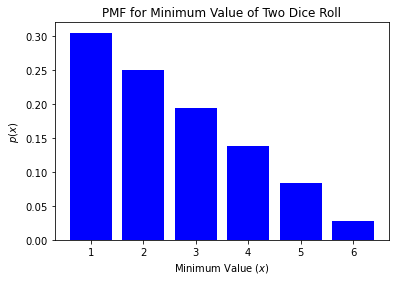

In [119]:
print(f'pmf = {pmf}')

plt.figure()
plt.bar(minimum_values, pmf, color='blue')
plt.ylabel('$p(x)$')
plt.xlabel('Minimum Value ($x$)')
plt.title('PMF for Minimum Value of Two Dice Roll')
plt.xticks(minimum_values, labels)
plt.show()

## 2.1e

cdf = [0.30555556 0.55555556 0.75       0.88888889 0.97222222 1.        ]


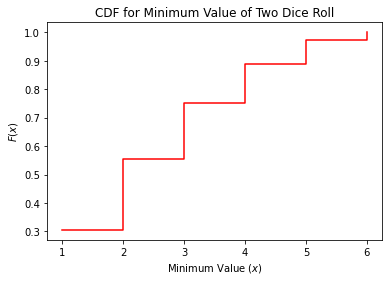

In [120]:
cdf = np.cumsum(pmf)
print(f"cdf = {cdf}")

plt.figure()
plt.step(minimum_values, cdf, '-r', where='post')
plt.ylabel('$F(x)$')
plt.xlabel('Minimum Value ($x$)')
plt.title('CDF for Minimum Value of Two Dice Roll')
plt.xticks(minimum_values, labels)
plt.show()

## 2.1f

In [121]:
# Define Process Generator
def generate_min_value_IVT():
    r= np.random.rand()
    # Determine minimum value of simulated dice roll by comparing the random probability (r) to the CDF
    for i in range(len(minimum_values)):
        if r <= cdf[i]:
            return minimum_values[i]

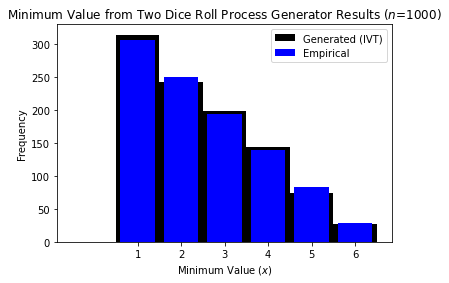

Sample Mean: 2.503
Sample Standard Deviation: 1.391
95% Confidence Interval: (2.41670189138105, 2.58929810861895)


In [122]:
# Define number of samples
num_samples = 1000

# Fill the samples array with samples from the generators
samples_ivt = [generate_min_value_IVT() for i in range(num_samples)]

# Create a new figure recreating the PMF bar plot
plt.figure()
plt.hist(samples_ivt, bins=range(8), align='left', color='black', label='Generated (IVT)')
plt.bar(minimum_values, pmf*num_samples, color='blue', label='Empirical')
plt.ylabel('Frequency')
plt.xlabel('Minimum Value ($x$)')
plt.title(f'Minimum Value from Two Dice Roll Process Generator Results ($n$={num_samples})')
plt.xticks(minimum_values, labels)
plt.legend()
plt.show()

#Convert list of samples to numpy array
samples_array = np.array(samples_ivt)

# Calculate sample mean
sample_mean = samples_array.mean()
print(f'Sample Mean: {sample_mean}')

# Calculate sample stadard deviation
sample_stdev = samples_array.std()
print(f'Sample Standard Deviation: {sample_stdev:.3f}')

# Calculate sample 95% confidence interval

deg_of_freedom = len(samples_ivt) # Find degrees of freedom
confidence = 0.95 
t_crit = np.abs(t.ppf((1-confidence)/2,deg_of_freedom)) # Calculate critical t value

conf_interval = (sample_mean-sample_stdev*t_crit/np.sqrt(len(samples_ivt)), sample_mean+sample_stdev*t_crit/np.sqrt(len(samples_ivt))) 
print(f'95% Confidence Interval: {conf_interval}')



# 2.2 Continuous Process Generator

## 2.2a: See attached document for work
#### Expected value = 7 minutes

## 2.2b:

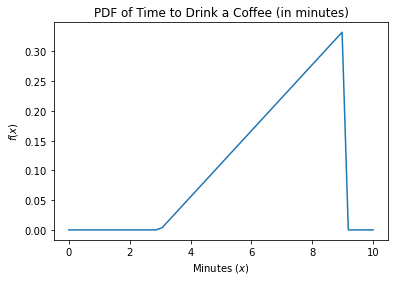

In [123]:
y = np.linspace(0,10) # Define a linear space between 0 and 10 minutes for random variable values

# Define a PDF according to the function given in the problem
pdf = (y-3)/18
# PDF is equal to 0 outside of the range 3 < y < 9
pdf[y<3] = 0 
pdf[y>9] = 0

# Plot PDF 
plt.plot(y, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('Minutes ($x$)')
plt.title("PDF of Time to Drink a Coffee (in minutes)")
plt.show()

## 2.2c: See Attached Document
#### CDF = (t^2 - 6t + 9) / 36

## 2.2d:

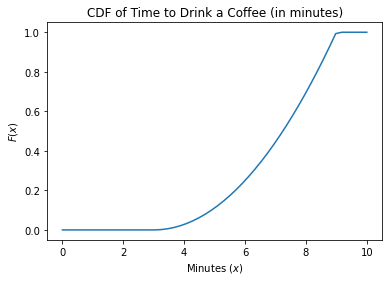

In [124]:
# Define CDF
cdf = (y**2-6*y+9)/36

#filtering the cdf between 3 and 9
cdf[y<3] = 0
cdf[y>9] = 1

# Plot CDF 
plt.plot(y, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('Minutes ($x$)')
plt.title("CDF of Time to Drink a Coffee (in minutes)")
plt.show()

## 2.2e

In [125]:
def generate_time_to_drink():
    r = np.random.rand()
    return(6*(r**(0.5)) + 3) # This equation was found by setting

print(f'Example time to drink a coffee: {generate_time_to_drink()} min')

Example time to drink a coffee: 8.055277894296644 min


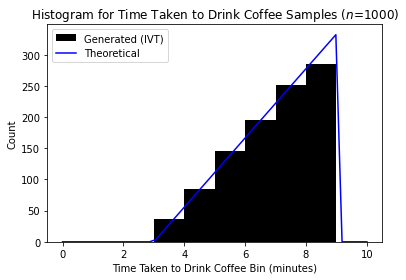

Sample mean: 6.928
Sample standard deviation: 1.434
95% Confidence Interval: (6.838614971786602, 7.0165715220983165)


In [126]:
# define number of samples
num_samples = 1000

# fill the samples arrays with samples from the generators
samples_ivt = [generate_time_to_drink() for i in range(num_samples)]

plt.figure()
plt.hist(samples_ivt, bins=range(10), color='black', label='Generated (IVT)')
plt.plot(y, pdf*num_samples, '-b', label='Theoretical')
plt.xlabel('Time Taken to Drink Coffee Bin (minutes)')
plt.ylabel('Count')
plt.title(f'Histogram for Time Taken to Drink Coffee Samples ($n$={num_samples})')
plt.legend()
plt.show()

# Convert list of samples to numpy array
samples_array = np.array(samples_ivt)

# Calculate Sample Mean
sample_mean = samples_array.mean()
print(f'Sample mean: {sample_mean:.3f}')

# Calculate Sample Standard Deviation
sample_stdev = samples_array.std()
print(f'Sample standard deviation: {sample_stdev:.3f}')

deg_of_freedom = len(samples_ivt) # Find degrees of freedom
confidence = 0.95 
t_crit = np.abs(t.ppf((1-confidence)/2,deg_of_freedom)) # Calculate critical t value

conf_interval = (sample_mean-sample_stdev*t_crit/np.sqrt(len(samples_ivt)), sample_mean+sample_stdev*t_crit/np.sqrt(len(samples_ivt))) 
print(f'95% Confidence Interval: {conf_interval}')




# 2.3 Arrivals at Cafe Java
## 2.3a
### Plotting the PDF and CDF was not necessary, but I did it just to have a visual representation

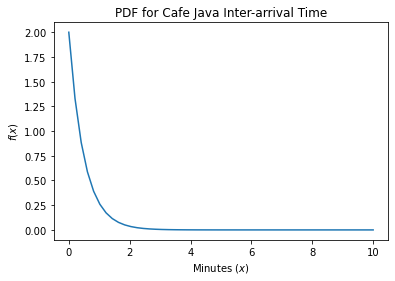

In [132]:
import math
_lambda = 2 # Customers per minute

z = np.linspace(0,10) # fill the samples arrays with samples from the generators
e = math.e

pdf = _lambda*e**(-_lambda*z)

# Plot PDF 
plt.plot(z, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('Minutes ($x$)')
plt.title("PDF for Cafe Java Inter-arrival Time")
plt.show()


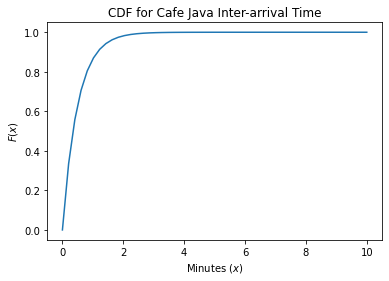

In [133]:
cdf = 1 - e**(-_lambda*z)

# Plot CDF 
plt.plot(z, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('Minutes ($x$)')
plt.title("CDF for Cafe Java Inter-arrival Time")
plt.show()

In [142]:
def generate_arrival_ivt():
    r = np.random.rand()
    return -np.log(1-r)/_lambda
    # note: the code above could be replaced with the built-in process generator:
    # return np.random.exponential(1/_lambda)

print(f'example inter-arrival period: {generate_arrival_ivt():.2f} min')

example inter-arrival period: 0.73 min


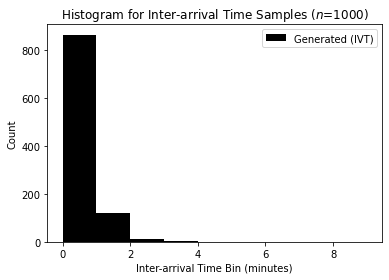

First ten samples:
0.317 minutes
0.356 minutes
0.002 minutes
0.581 minutes
0.074 minutes
0.547 minutes
2.556 minutes
0.538 minutes
0.178 minutes
0.168 minutes


In [211]:
# define number of samples
num_samples = 1000

# fill the samples arrays with samples from the generators
samples_ivt = [generate_arrival_ivt() for i in range(num_samples)]

# Plot histogram for the inter-arrival times of the samples
plt.figure()
plt.hist(samples_ivt, bins=range(10), color='black', label='Generated (IVT)')
plt.xlabel('Inter-arrival Time Bin (minutes)')
plt.ylabel('Count')
plt.title(f'Histogram for Inter-arrival Time Samples ($n$={num_samples})')
plt.legend()
plt.show()

first_ten_samples = [round(i,3) for i in samples_ivt[:10]] # Create rounded list of first 10 samples (for easy readability)

print('First ten samples:' ) # Print first 10 samples
for i in first_ten_samples:
    print(f'{i} minutes')

# 2.3b

In [212]:
arrival_times = [] # Create list to hold each arrival time

for i in range(1,len(samples_ivt)+1): # Count from 1 to 1000 (number of samples)
    arrival_times.append(sum(samples_ivt[:i])) # For each sample, append the cumulative sum of arrival times for all prior customers to arrival_times


first_ten_arrivals = [round(i,3) for i in arrival_times[:10]] # Create a list of rounded first 10 arrival times (for easy readability)

print(f'The first 10 arrival times are: ') # Print the first 10 arrival times
for i in range(1, len(first_ten_arrivals)+1):
    print(f'Arrival {i}: {first_ten_arrivals[i-1]} minutes')

The first 10 arrival times are: 
Arrival 1: 0.317 minutes
Arrival 2: 0.673 minutes
Arrival 3: 0.675 minutes
Arrival 4: 1.257 minutes
Arrival 5: 1.331 minutes
Arrival 6: 1.877 minutes
Arrival 7: 4.434 minutes
Arrival 8: 4.972 minutes
Arrival 9: 5.15 minutes
Arrival 10: 5.318 minutes


# 2.3c

In [213]:
customers_each_min = [] # Create list to hold the number of customers arriving each minute

for i in range(1,301): # Loop through k1 to k300
    count = 0 # The count resets after each k

    for time in arrival_times: # For each k, check how many arrival times fit into the bin
        if i-1 < time < i:
            count += 1 # Count the number of times that fit into the bin
    customers_each_min.append(count) # Append the count for each minute into customers_each_min

for i in range(1,6):
    print(f'Min {i}: {customers_each_min[i-1]} arrivals')


Min 1: 3 arrivals
Min 2: 3 arrivals
Min 3: 0 arrivals
Min 4: 0 arrivals
Min 5: 2 arrivals


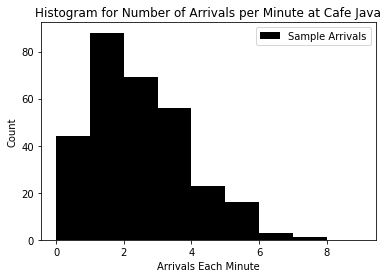

In [214]:
# Plot histogram for the number of arrivals each minute

plt.figure()
plt.hist(customers_each_min, bins=range(10), color='black', label='Sample Arrivals')
plt.xlabel('Arrivals Each Minute')
plt.ylabel('Count')
plt.title(f'Histogram for Number of Arrivals per Minute at Cafe Java')
plt.legend()
plt.show()

# 2.3d

### Poisson distribution